# Importo librerias y df

In [808]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
!pip install statsmodels
from PIL import Image
import plotly.io as pio
from matplotlib.colors import ListedColormap

In [809]:
%matplotlib inline

In [ ]:
# Becas por mes
becas_por_mes_h = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\becas_por_mes_h.pkl')
becas_por_mes_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\becas_por_mes_v.pkl')
# Becas
becas = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\becas.pkl')

becados_hand = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\becados_hand.pkl') 
becados_voley = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\becados_voley.pkl')
costo_total_becas = pd.read_pickle(r"C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\costo_total_becas.pkl")

In [ ]:
# Ingresos y egresos de dinero
# Handball
egresos_reales = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\egresos_h.pkl')
ingresos_reales = pd.read_pickle(r"C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\ingresos_reales.pkl")
# Voley
egresos_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\egresos_v.pkl')
ingresos_voley = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\ingresos_v.pkl')

In [ ]:
ingresos_egresos_h = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\ingresos_egresos_h.pkl')
ingresos_egresos_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\ingresos_egresos_v.pkl')

In [ ]:
# Pago de cuotas por categoria
pagos_hand_limpio = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\pagos_hand_limpio.pkl')
pagos_voley_limpio = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\pagos_voley_limpio.pkl')

In [ ]:
# Resultados de ingresos, egresos, permanencias, totales de alumnos y porcentajes
resultados_h = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\resultados_h.pkl')
resultados_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\resultados_v.pkl')

In [ ]:
# Listado de socios
socios_2024 = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\socios_2024.pkl')

In [ ]:
# DF de socios por mes
socios_por_mes_tot = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\EDA_Club_RN\PICKLES\socios_por_mes_tot.pkl') 

# Divido el df socios_por_mes_tot en dos para que sea mas manejable 
socios_hand_por_mes = socios_por_mes_tot.iloc[:, :2]
socios_vol_por_mes = socios_por_mes_tot.drop(columns='SOCIOS_HAND')

# 1. Análisis de la Sostenibilidad Financiera

#### Como primera medida comenzamos con un pantallazo de ingresos y egresos mensuales del año. 
Aqui vemos como los ingresos en casi todos los meses son mayores, aunque no por mucho. 

In [817]:
# Crear el DataFrame 'totales_por_mes' con las columnas correspondientes
x = ingresos_egresos_h

# Definir las trazas (traces) para los ingresos y egresos
trace1 = {
    'x': x['FECHA'],  # Usamos la columna 'FECHA' para el eje X
    'y': ingresos_egresos_h['INGRESOS'],
    'name': 'Ingresos',
    'type': 'bar',
    'marker': {'color': '#900C3F'}  # Color para los ingresos
}

trace2 = {
    'x': x['FECHA'],  # Usamos la columna 'FECHA' para el eje X
    'y': ingresos_egresos_h['EGRESOS'],
    'name': 'Egresos',
    'type': 'bar',
    'marker': {'color': '#FF5733'}  # Color para los egresos
}

# Lista de trazas
data = [trace1, trace2]

# Layout del gráfico
layout = {
    'xaxis': {
        'title': 'Fecha',  # Título para el eje X
        'tickangle': 45,  # Rotar las etiquetas del eje X para una mejor visualización
        'tickmode': 'array',  # Asegura que las fechas se muestren de manera ordenada
    },
    'yaxis': {
        'title': 'Monto Total',  # Título para el eje Y
        'tickprefix': '$',  # Añadir el símbolo de moneda
        'showgrid': True,  # Mostrar las líneas de la rejilla en el fondo
        'gridcolor': 'lightgrey'  # Color de las líneas de la rejilla
    },
    'barmode': 'group',  # Agrupar las barras para cada mes
    'title': 'Ingresos y Egresos Mensuales 2024',  # Título principal del gráfico
    'plot_bgcolor': 'white',  # Color de fondo del gráfico
    'paper_bgcolor': '#f4f4f4',  # Color de fondo exterior del gráfico
    'margin': {'l': 50, 'r': 50, 't': 50, 'b': 100},  # Ajuste de márgenes
    'hovermode': 'x unified',  # Mostrar la información en el hover de manera unificada
}

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar el gráfico
fig.show()
# pio.write_html(fig, 'Ingresos_y_Egresos.html', auto_open=True)

- En el mes de febrero hubieron ligeramente mas egresos que ingresos. Al igual que en Junio. 
- En la grafica siguiente, ademas de los ingresos y agresos he agregado el saldo: el resultante de egresos - ingresos acumulado mes a mes, y vemos que solo estamos en negativo en el mes de Febrero, el resto de los meses hemos superado ese umbral negativo, que ayuda a salvar los meses en que los egresos puedan superar los ingresos.

- A diferencia de lo que sucede con handball, en Voley los inresos superan los egresos cada mes. A veces incluso con ampliasuperioridad, como por ejemplo el mes de julio. 
- En esta grafica, ademas de los ingresos y agresos he agregado el saldo: el resultante de egresos - ingresos acumulado mes a mes, y vemos que solo estamos en negativo en el mes de Febrero, el resto de los meses hemos superado ese umbral negativo, que ayuda a salvar los meses en que los egresos puedan superar los ingresos.

Analisis de los ingresos, egresos y saldo con valores reales

In [818]:
ingresos_egresos_h
# Crear la columna 'Saldo Acumulado' sumando los valores mes a mes en la columna 'SALDO'
ingresos_egresos_h['Acumulado'] = ingresos_egresos_h['SALDO'].cumsum()

In [819]:
# Crear la figura con las tres series de tiempo en el mismo gráfico
fig = go.Figure()

# Ingresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['INGRESOS'], 
    mode='lines+markers',
    line=dict(color='#900C3F', width=2), 
    marker=dict(size=8, color='#900C3F', symbol='circle'),
    name='Ingresos'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['EGRESOS'], 
    mode='lines+markers',
    line=dict(color='#FF5733', width=2), 
    marker=dict(size=8, color='#FF5733', symbol='circle'),
    name='Egresos'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['Acumulado'], 
    mode='lines+markers',
    line=dict(color='#FFC300', width=2), 
    marker=dict(size=8, color='#FFC300', symbol='circle'),
    name='Saldo'
))

# Línea punteada en Y = 0 (ahora usando el rango extendido del eje X)
fig.add_shape(
    type="line",
    x0="FEB", x1="OCT",  # Ajustar manualmente para que cubra todo el rango
    y0=0, y1=0,
    line=dict(color="grey", width=0.5, dash="dash"),
)

# Configuración del diseño
fig.update_layout(
    title='Balance Anual: Ingresos, Egresos y Saldo',
    xaxis_title='Fecha',
    yaxis_title='Monto ($)',
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(title='Categoría', orientation='h', x=0.5, xanchor='center', y=1.1)
)

# Configurar los ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgrey', tickformat='%b %Y')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Mostrar el gráfico
fig.show()
# pio.write_html(fig, 'Balance Anual.html', auto_open=True)

Ajusto ingresos y egresos con inflacion

In [820]:
# Calculo el porcentaje de aumento de las cuotas, para tenerlo en cuenta luego: 
valor_1 = 7200 # de febrero a abril
valor_2 = 8700 # de mayo a agosto
valor_3 = 11500 # de septiembre en adelante 
primer_aumento = round(((valor_2 - valor_1)/valor_1) * 100,2)
print("Primer aumento: ", primer_aumento)

segundo_aumento = round(((valor_3 - valor_2)/valor_2) * 100,2)
print("Segundo aumento: ", segundo_aumento)

Primer aumento:  20.83
Segundo aumento:  32.18


Creo una funcion para aplicar los coeficientes de inflacion a mis columnas

In [821]:
def ajustar_valores(df, meses1, ajuste1, meses2, ajuste2):
     # Recorrer cada fila del DataFrame
    for index, row in df.iterrows():
        # Si la fecha del mes es uno de los meses indicados
        if row['FECHA'] in meses1:
            # Asignar el nuevo valor de INGRESOS-INFLACION a la nueva columna
            df.at[index, 'INGRESOS-INFLACION'] = round(row['INGRESOS'] - (row['INGRESOS'] * ajuste1), 2) 
            df.at[index, 'EGRESOS-INFLACION'] = round(row['EGRESOS'] - (row['EGRESOS'] * ajuste1), 2) 
        elif row['FECHA'] in meses2:
            # Asignar el nuevo valor de INGRESOS-INFLACION a la nueva columna
            df.at[index, 'INGRESOS-INFLACION'] = round(row['INGRESOS'] - (row['INGRESOS'] * ajuste2), 2)
            df.at[index, 'EGRESOS-INFLACION'] = round(row['EGRESOS'] - (row['EGRESOS'] * ajuste2), 2) 
        else:
            df.at[index, 'INGRESOS-INFLACION'] = row['INGRESOS']
            df.at[index, 'EGRESOS-INFLACION'] = row['EGRESOS']
    return df

Agrego columnas con ingresos egresos y saldo sin ceoeficiente de inflacion

In [822]:
# Crear la columna 'Saldo Acumulado' sumando los valores mes a mes en la columna 'SALDO'
ingresos_egresos_h['SALDO ACUMULADO'] = ingresos_egresos_h['SALDO'].cumsum()
ingresos_egresos_h

,FECHA,INGRESOS,EGRESOS,SALDO,INGRESOS POR SOCIO,EGRESOS POR SOCIO,SALDO POR SOCIO,Acumulado,SALDO ACUMULADO
0,FEB,583660.00,595937.00,-12277.00,7580.00,7739.44,-159.44,-12277.00,-12277.00
1,MAR,749510.00,654554.00,94956.00,6143.52,5365.20,778.33,82679.00,82679.00
2,ABR,824019.98,671780.00,152239.98,6103.85,4976.15,1127.70,234918.98,234918.98
3,MAY,970029.00,921975.48,48053.52,7029.20,6680.98,348.21,282972.50,282972.50
4,JUN,1113898.00,1168196.00,-54298.00,7682.06,8056.52,-374.47,228674.50,228674.50
5,JUL,1087640.00,1025506.99,62133.01,8302.60,7828.30,474.30,290807.51,290807.51
6,AGO,1178750.00,1147687.00,31063.00,7964.53,7754.64,209.89,321870.51,321870.51
7,SEPT,1393384.99,1100452.00,292932.99,9227.72,7287.76,1939.95,614803.50,614803.50
8,OCT,1442885.02,1153801.64,289083.38,9308.94,7443.88,1865.05,903886.88,903886.88


In [823]:
meses1 = ['MAY', 'JUN', 'JUL', 'AGO']
meses2 = ['SEPT', 'OCT']
ajuste1 = 0.2083
ajuste2 = 0.3218

# Llamar a la función para ajustar los ingresos
ingresos_egresos_h = ajustar_valores(ingresos_egresos_h, meses1, ajuste1, meses2, ajuste2)

ingreso_por_socio = round(ingresos_egresos_h['INGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_HAND'],2)
ingresos_egresos_h['INGRESOS POR SOCIO'] = ingreso_por_socio

egreso_por_socio = round(ingresos_egresos_h['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_HAND'],2)
ingresos_egresos_h['EGRESOS POR SOCIO'] = egreso_por_socio

ingresos_egresos_h['SALDO POR SOCIO'] = ingresos_egresos_h['INGRESOS POR SOCIO'] - ingresos_egresos_h['EGRESOS POR SOCIO']

ingresos_egresos_h['SALDO-INFLACION'] = ingresos_egresos_h['INGRESOS-INFLACION'] - ingresos_egresos_h['EGRESOS-INFLACION']

# Crear la columna 'Saldo Acumulado' sumando los valores mes a mes en la columna 'SALDO'
ingresos_egresos_h['Acumulado sin inflacion'] = ingresos_egresos_h['SALDO-INFLACION'].cumsum()
ingresos_egresos_h

,FECHA,INGRESOS,EGRESOS,SALDO,INGRESOS POR SOCIO,EGRESOS POR SOCIO,SALDO POR SOCIO,Acumulado,SALDO ACUMULADO,INGRESOS-INFLACION,EGRESOS-INFLACION,SALDO-INFLACION,Acumulado sin inflacion
0,FEB,583660.00,595937.00,-12277.00,7580.00,7739.44,-159.44,-12277.00,-12277.00,583660.00,595937.00,-12277.00,-12277.00
1,MAR,749510.00,654554.00,94956.00,6143.52,5365.20,778.32,82679.00,82679.00,749510.00,654554.00,94956.00,82679.00
2,ABR,824019.98,671780.00,152239.98,6103.85,4976.15,1127.70,234918.98,234918.98,824019.98,671780.00,152239.98,234918.98
3,MAY,970029.00,921975.48,48053.52,5565.01,5289.33,275.68,282972.50,282972.50,767971.96,729927.99,38043.97,272962.95
4,JUN,1113898.00,1168196.00,-54298.00,6081.88,6378.35,-296.47,228674.50,228674.50,881873.05,924860.77,-42987.72,229975.23
5,JUL,1087640.00,1025506.99,62133.01,6573.16,6197.66,375.50,290807.51,290807.51,861084.59,811893.88,49190.71,279165.94
6,AGO,1178750.00,1147687.00,31063.00,6305.52,6139.35,166.17,321870.51,321870.51,933216.38,908623.80,24592.58,303758.52
7,SEPT,1393384.99,1100452.00,292932.99,6258.24,4942.56,1315.68,614803.50,614803.50,944993.70,746326.55,198667.15,502425.67
8,OCT,1442885.02,1153801.64,289083.38,6313.32,5048.44,1264.88,903886.88,903886.88,978564.62,782508.27,196056.35,698482.02


Grafico ingresos y egresos con y sin inflacion para comparar

In [824]:
# Crear la figura con ingresos y egresos y sus correspondientes valores conforme la inflacion.  
fig = go.Figure()

# Ingresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['INGRESOS'], 
    mode='lines+markers',
    line=dict(color='#900C3F', width=2), 
    marker=dict(size=8, color='#900C3F', symbol='circle'),
    name='Ingresos'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['EGRESOS'], 
    mode='lines+markers',
    line=dict(color='#FF5733', width=2), 
    marker=dict(size=8, color='#FF5733', symbol='circle'),
    name='Egresos'
))
# Ingresos - INFLACION
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['INGRESOS-INFLACION'], 
    mode='lines+markers',
    line=dict(color='#C70039', width=2), 
    marker=dict(size=8, color='#C70039', symbol='circle'),
    name='INGRESOS-INFLACION'
))

# Egresos - INFLACION
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['EGRESOS-INFLACION'], 
    mode='lines+markers',
    line=dict(color='#FF9F00', width=2), 
    marker=dict(size=8, color='#FF9F00', symbol='circle'),
    name='EGRESOS-INFLACION'
))

# Línea punteada en Y = 0 (ahora usando el rango extendido del eje X)
fig.add_shape(
    type="line",
    x0="FEB", x1="OCT",  # Ajustar manualmente para que cubra todo el rango
    y0=0, y1=0,
    line=dict(color="grey", width=0.5, dash="dash"),
)

# Configuración del diseño
fig.update_layout(
    title='Balance Anual: Ingresos, Egresos brutos y netos',
    xaxis_title='Fecha',
    yaxis_title='Monto ($)',
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(title='Categoría', orientation='h', x=0.5, xanchor='center', y=1.5)
)

# Configurar los ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgrey', tickformat='%b %Y')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Mostrar el gráfico
fig.show()
# pio.write_html(fig, 'Ingresos_y_egresos_inflacion.html', auto_open=True)

In [825]:
# Agrupar por año y mes, y por categoría, y sumar los montos
eg_totales_por_mes_categoria = egresos_reales.groupby([egresos_reales['FECHA'].dt.to_period('M'), 'DESCRIPCION'])[['MONTO']].sum().reset_index()

# Cambiar el formato del periodo a un tipo de fecha
eg_totales_por_mes_categoria['FECHA'] = eg_totales_por_mes_categoria['FECHA'].dt.to_timestamp()

# Renombrar la columna de montos
eg_totales_por_mes_categoria.rename(columns={'MONTO': 'MONTO TOTAL'}, inplace=True)
eg_totales_por_mes_categoria

,FECHA,DESCRIPCION,MONTO TOTAL
0,2024-02-01,Gastos Locacion,62000.00
1,2024-02-01,Materiales,223437.00
2,2024-02-01,Salarios,300500.00
3,2024-02-01,Seguro,10000.00
4,2024-03-01,Gastos Locacion,42054.00
5,2024-03-01,Salarios,612500.00
6,2024-04-01,Gastos Locacion,3500.00
7,2024-04-01,Salarios,476500.00
8,2024-04-01,Seguro,191780.00
9,2024-05-01,Salarios,774645.48


In [826]:
ingresos_totales_por_mes = ingresos_reales.groupby(ingresos_reales['FECHA'].dt.to_period('M'))[['MONTO']].sum().reset_index()

In [827]:
# Agrupar por año y mes, y por categoría, y sumar los montos
ing_totales_por_mes_categoria = ingresos_reales.groupby([ingresos_reales['FECHA'].dt.to_period('M'), 'CATEGORIA'])[['MONTO']].sum().reset_index()

# Cambiar el formato del periodo a un tipo de fecha
ing_totales_por_mes_categoria['FECHA'] = ing_totales_por_mes_categoria['FECHA'].dt.to_timestamp()

# Renombrar la columna de montos
ing_totales_por_mes_categoria.rename(columns={'MONTO': 'MONTO TOTAL'}, inplace=True)
ing_totales_por_mes_categoria

,FECHA,CATEGORIA,MONTO TOTAL
0,2024-02-01,Cadetes,103320.00
1,2024-02-01,Infantiles,54450.00
2,2024-02-01,Juveniles,54620.00
3,2024-02-01,Mayores,121860.00
4,2024-02-01,Menores,94400.00
5,2024-02-01,Mini,35010.00
6,2024-02-01,No procede,120000.00
7,2024-03-01,Cadetes,109160.00
8,2024-03-01,Infantiles,83190.00
9,2024-03-01,Juveniles,52920.00


In [828]:
def ajustar_montos(df, meses1, ajuste1, meses2, ajuste2):
    # Asegurarse de que la columna 'FECHA' esté en formato datetime y luego convertir a Period[M]
    df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce').dt.to_period('M')  # Convertir a Period[M]
    
    # Convertir meses1 y meses2 a Period[M] sin acceder a .dt
    meses1 = pd.to_datetime(meses1).to_period('M')  # Convertir a Period[M]
    meses2 = pd.to_datetime(meses2).to_period('M')  # Convertir a Period[M]
    
    # Recorrer cada fila del DataFrame
    for index, row in df.iterrows():
        # Si la fecha del mes es uno de los meses indicados en meses1
        if row['FECHA'] in meses1:
            # Restar el ajuste1 (ajuste de 20.83%) y asignar el resultado a 'EGRESOS-INFLACION'
            df.at[index, 'EGRESOS-INFLACION'] = round(row['MONTO TOTAL'] - (row['MONTO TOTAL'] * ajuste1), 2)
        # Si la fecha del mes es uno de los meses indicados en meses2
        elif row['FECHA'] in meses2:
            df.at[index, 'EGRESOS-INFLACION'] = round(row['MONTO TOTAL'] - (row['MONTO TOTAL'] * ajuste2), 2)
        else:
            # Si no es ninguno de esos meses, copiar el valor original a 'EGRESOS-INFLACION'
            df.at[index, 'EGRESOS-INFLACION'] = row['MONTO TOTAL']
    
    return df

# Definir los meses y ajustes
meses1 = ['2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01']
meses2 = ['2024-09-01', '2024-10-01']
ajuste1 = 0.2083  # 20.83% de ajuste
ajuste2 = 0.3218  # 32.18% de ajuste

# Llamar a la función para ajustar los egresos
eg_totales_por_mes_categoria = ajustar_montos(eg_totales_por_mes_categoria, meses1, ajuste1, meses2, ajuste2)

# Verificar el DataFrame ajustado
eg_totales_por_mes_categoria.to_pickle('eg_totales_por_mes_categoria.pkl')
eg_totales_por_mes_categoria

,FECHA,DESCRIPCION,MONTO TOTAL,EGRESOS-INFLACION
0,2024-02,Gastos Locacion,62000.00,62000.00
1,2024-02,Materiales,223437.00,223437.00
2,2024-02,Salarios,300500.00,300500.00
3,2024-02,Seguro,10000.00,10000.00
4,2024-03,Gastos Locacion,42054.00,42054.00
5,2024-03,Salarios,612500.00,612500.00
6,2024-04,Gastos Locacion,3500.00,3500.00
7,2024-04,Salarios,476500.00,476500.00
8,2024-04,Seguro,191780.00,191780.00
9,2024-05,Salarios,774645.48,613286.83


In [829]:
# Llamar a la función para ajustar los INGRESOS
ing_totales_por_mes_categoria = ajustar_montos(ing_totales_por_mes_categoria, meses1, ajuste1, meses2, ajuste2)
# Verificar el DataFrame ajustado
ing_totales_por_mes_categoria.to_pickle('ing_totales_por_mes_categoria.pkl')
ing_totales_por_mes_categoria

,FECHA,CATEGORIA,MONTO TOTAL,EGRESOS-INFLACION
0,2024-02,Cadetes,103320.00,103320.00
1,2024-02,Infantiles,54450.00,54450.00
2,2024-02,Juveniles,54620.00,54620.00
3,2024-02,Mayores,121860.00,121860.00
4,2024-02,Menores,94400.00,94400.00
5,2024-02,Mini,35010.00,35010.00
6,2024-02,No procede,120000.00,120000.00
7,2024-03,Cadetes,109160.00,109160.00
8,2024-03,Infantiles,83190.00,83190.00
9,2024-03,Juveniles,52920.00,52920.00


In [830]:
eg_totales_por_mes_categoria['DESCRIPCION'] = eg_totales_por_mes_categoria['DESCRIPCION'].replace({'AMPAT': 'Seguros', 'Seguro AP': 'Seguros',  'Seguro RC': 'Seguros'})

- Este heatmap tiene los egresos por categoria en su eje X, y los meses evaluados, para poder ver rapidamente los gastos mas importantes mes a mes.

- con este heatmap vemos que hubieron gastos extraordinarios de materiales: siendo inicio de año, tiene sentido que este mes se haya gastado mucho dinero en materiales. Se gasto casi lo mismo en materiales que en salarios, que es el gasto mayor que hay por mes. El resto de los meses casi no hubieron gastos significativos en este rubro, excepto en junio que se volvio a hacer una gran compra.
- justamente en estos dos meses vemos que se ha hecho un gasto extraordinario en materiales, y son los dos meses en que hemos tenido mas egresos que ingresos. Sin embrago, ya para el mes de junio vemos que ya el club tenia un cierto saldo acumulado, por lo este gasto extraordinario encuentra a las finanzas del club mejor paradas. 
- el resto de los meses, los ingresos han superado a los egresos, lo que permitio al club que a lo largo del anio el saldo acumulado vaya creciendo.  

In [831]:
egresos_inflacion = eg_totales_por_mes_categoria.groupby(eg_totales_por_mes_categoria['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()

Egresos mensuales con inflacion

In [832]:
egresos_inflacion['FECHA'].values

array([Period('2024-02', 'M'), Period('2024-03', 'M'),
       Period('2024-04', 'M'), Period('2024-05', 'M'),
       Period('2024-06', 'M'), Period('2024-07', 'M'),
       Period('2024-08', 'M'), Period('2024-09', 'M'),
       Period('2024-10', 'M')], dtype=object)

In [833]:
# Asignar 'FECHA' al eje X y 'EGRESOS-INFLACION' al eje Y
x = ['2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10']
y = egresos_inflacion['EGRESOS-INFLACION']

# Definir la traza para los egresos
trace1 = go.Bar(
    x=x,  # Fecha en el eje X
    y=y,  # Total de egresos en el eje Y
    name='Egresos por mes',
    marker={'color': '#900C3F'}
)

# Lista de trazas
data = [trace1]

# Layout del gráfico
layout = go.Layout(
    xaxis={
        'title': 'Fecha',
        'tickangle': 45,
        'tickmode': 'array',
        'tickformat': '%Y-%m',  # Formato de fecha para mostrar año y mes
    },
    yaxis={
        'title': 'Monto Total',
        'tickprefix': '$',
        'showgrid': True,
        'gridcolor': 'lightgrey'
    },
    barmode='group',
    title='Egresos Mensuales 2024',
    plot_bgcolor='white',
    paper_bgcolor='#f4f4f4',
    margin={'l': 50, 'r': 50, 't': 50, 'b': 100},
    hovermode='x unified'
)

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar el gráfico
fig.show()

# Exportar a HTML si deseas
pio.write_html(fig, 'Egresos_inflacion.html', auto_open=True)


Handball

In [834]:
ing_totales_por_mes_categoria.columns=['FECHA', 'CATEGORIA', 'MONTO TOTAL', 'INGRESOS-INFLACION']
ing_totales_por_mes_categoria

,FECHA,CATEGORIA,MONTO TOTAL,INGRESOS-INFLACION
0,2024-02,Cadetes,103320.00,103320.00
1,2024-02,Infantiles,54450.00,54450.00
2,2024-02,Juveniles,54620.00,54620.00
3,2024-02,Mayores,121860.00,121860.00
4,2024-02,Menores,94400.00,94400.00
5,2024-02,Mini,35010.00,35010.00
6,2024-02,No procede,120000.00,120000.00
7,2024-03,Cadetes,109160.00,109160.00
8,2024-03,Infantiles,83190.00,83190.00
9,2024-03,Juveniles,52920.00,52920.00


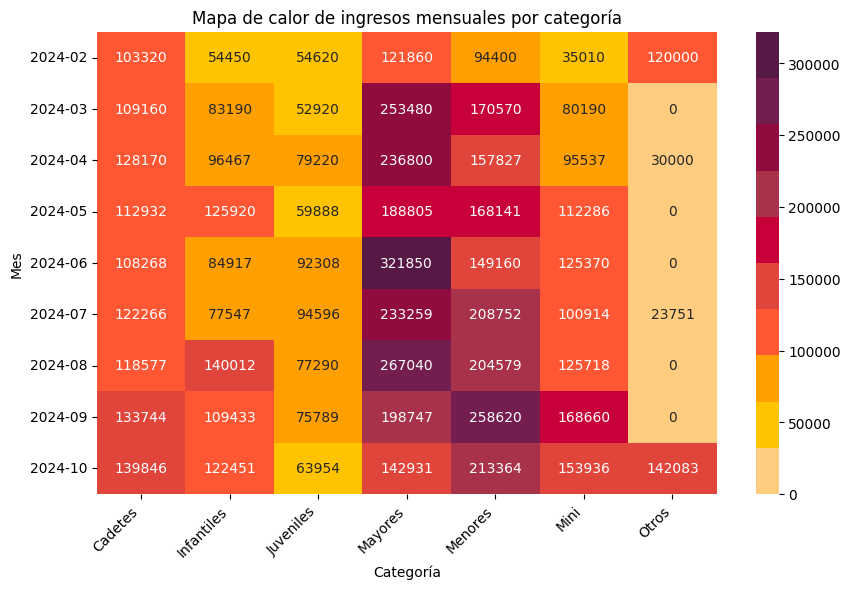

In [835]:
# Convertir la columna FECHA al primer día del mes
ing_totales_por_mes_categoria['FECHA'] = ing_totales_por_mes_categoria['FECHA']

# Calcular el total de gastos por mes y por categoría
ingresos_mensuales = ing_totales_por_mes_categoria.groupby(['FECHA', 'CATEGORIA'])[['INGRESOS-INFLACION']].sum().unstack(fill_value=0)

# Definir la paleta de colores personalizada
colores_personalizados = ['#FFCC80', '#FFC300', '#FF9F00', '#FF5733', '#E0453C', '#C70039', '#A83249', '#900C3F', '#731E4E', '#581845']

# Crear el heatmap con la paleta de colores personalizada
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    ingresos_mensuales,
    annot=True,
    fmt=".0f",
    cmap=sns.color_palette(colores_personalizados, as_cmap=True)
)

# Configurar el título y etiquetas del gráfico
plt.title("Mapa de calor de ingresos mensuales por categoría")
plt.xlabel("Categoría")
plt.ylabel("Mes")

nuevas_etiquetas = ['Cadetes', 'Infantiles', 'Juveniles', 'Mayores', 'Menores', 'Mini', 'Otros']
ax.set_xticklabels(nuevas_etiquetas, rotation=45, ha="right") 

plt.show()

### Socios
Evaluamos los socios segun la categoria 

Handball

In [836]:
media_socios_por_mes = resultados_h.groupby('CATEGORIA')[['SOCIOS']].mean().reset_index()

In [837]:
# Datos para el gráfico
pie1_list = media_socios_por_mes.SOCIOS
labels = media_socios_por_mes.CATEGORIA

# Definir la paleta de colores
colors = [
    '#FF5733',  # color-3
    '#C70039',  # color-4
    '#900C3F',  # color-5
    '#581845',  # color-6
    '#FF9F00',   # color-7 (naranja claro)
    '#FFCC80',  # color-1
    '#FFC300'  # color-2
]

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},
            name="Jugadores por categoría",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Jugadores por categoría",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 30},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.28,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)
# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Media_juadores_h.html', auto_open=True)

Vamos a ir un pasito mas alla, y evaluar la cantidad de socios por mes. Para ver si ese es el motivo por el cual hubieron menos ingresos. 

Handball

In [838]:
fig = px.bar(socios_hand_por_mes, x='MES', y='SOCIOS_HAND', 
             barmode='group',
             title='Comparativa Mensual de Socios',
             labels={'SOCIOS_HAND': 'Socios', 'FECHA': 'Fecha'})

fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Total socios",
    plot_bgcolor='white',
    hovermode='x unified'
)

# Cambiar el color de las barras
fig.update_traces(marker_color='#C70039')  # Establecer el color de las barras

fig.show()
pio.write_html(fig, 'Socios_Por_mes.html', auto_open=True)

Vemos que en el mes de febrero los socios fueron pocos comparado con el resto de los meses, lo cual es de esperar, ya que es el comienzo del año. 
- Hubo un primer gran salto en el numero de socios de febrero a marzo, y siguio aumentando paulativamente hasta julio, que los socios bajaron (14 jugadores menos). 
- sin embargo, esta baja de socios no impacto significativamente en la relacion ingresos-egresos, ya que pudimos mantenernos por encima del umbral. 

Todo esto puede verse mas claro cuando evaluamos los ingresos y egresos por socio, para calcular cuanto influye en las arcas del club, que un socio abandone la institucion. 

In [839]:
media_ingr_por_soc = round(ingresos_egresos_h['INGRESOS POR SOCIO'].mean(),2)
media_egre_por_soc = round(ingresos_egresos_h['EGRESOS POR SOCIO'].mean(),2)
media_saldo_por_soc = round(ingresos_egresos_h['SALDO POR SOCIO'].mean(),2)
print(media_ingr_por_soc)
print(media_egre_por_soc)
print(media_saldo_por_soc)

6324.94
5786.28
538.67


In [840]:
# Crear la figura con las tres series de tiempo en el mismo gráfico
fig = go.Figure()

# Ingresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['INGRESOS POR SOCIO'], 
    mode='lines+markers',
    line=dict(color='#900C3F', width=2), 
    marker=dict(size=8, color='#900C3F', symbol='circle'),
    name='Ingresos por socio'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['EGRESOS POR SOCIO'], 
    mode='lines+markers',
    line=dict(color='#FF5733', width=2), 
    marker=dict(size=8, color='#FF5733', symbol='circle'),
    name='Egresos por socio'
))

# Saldo Acumulado
fig.add_trace(go.Scatter(
    x=ingresos_egresos_h['FECHA'], 
    y=ingresos_egresos_h['SALDO POR SOCIO'], 
    mode='lines+markers',
    line=dict(color='#FFC300', width=2),  
    marker=dict(size=8, color='#FFC300', symbol='circle'),
    name='Saldo por socio'
))

# Línea punteada en Y = 0 (ahora usando el rango extendido del eje X)
fig.add_shape(
    type="line",
    x0="FEB", x1="OCT",  # Ajustar manualmente para que cubra todo el rango
    y0=0, y1=0,
    line=dict(color="grey", width=0.5, dash="dash"),
)

# Configuración del diseño
fig.update_layout(
    title='Balance por socio: Ingresos, Egresos y Saldo',
    xaxis_title='Fecha',
    yaxis_title='Monto ($)',
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(title='Categoría', orientation='h', x=0.5, xanchor='center', y=1.1)
)

# Configurar los ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgrey', tickformat='%b %Y')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Balance_por_socio.html', auto_open=True)

In [841]:
ingresos_totales_por_mes = ingresos_reales.groupby(ingresos_reales['FECHA'].dt.to_period('M'))[['MONTO']].sum().reset_index()
ingresos_totales_por_mes['SOCIOS']=[ 77, 122, 135, 138, 145, 131, 148, 151, 155]
ingresos_y_socios=ingresos_totales_por_mes
ingresos_y_socios['MONTO']/ingresos_y_socios['SOCIOS']
ingresos_totales_por_mes

,FECHA,MONTO,SOCIOS
0,2024-02,583660.00,77
1,2024-03,749510.00,122
2,2024-04,824019.98,135
3,2024-05,970029.00,138
4,2024-06,1113898.00,145
5,2024-07,1087640.00,131
6,2024-08,1178750.00,148
7,2024-09,1393384.99,151
8,2024-10,1442885.02,155


In [842]:
solo_cuotas = ['Cuota', 'Cuota adeudada', 'Cuota medio mes']
cuotas = ingresos_reales[ingresos_reales['DESCRIPCION'].isin(solo_cuotas)]
cuotas=cuotas.reset_index(drop=True)

Con esta grafica podemos concluir que la fluctuacion de socios no es directamente determinante de la cantidad de ingresos/egresos/saldo acumulado por socio, ya que vamos que en mayo y julio hubieron menos socios (encontrandose el mes de junio con mas socios que los meses mencionados), y sin embargo la grafica de dinero nos muestra que desde abril hasta junio inclusive fue en descenso, con un gran salto en julio donde los ingresos fueron considerablemente mayores que los egresos, y volviendo a bajar muy poquito y de forma paulatina hacia finde anio.

Esto nos deja el interrogante de: que es lo que hace que los ingresos de socios suban, pero los ingresos de dinero bajen, y visceversa, sin ninguna correlacion. 

Lo veremos luego con mas detalle cuando analicemos el porcentaje de compromiso financiero

### Evaluamos ingresos por cat

Handball

In [843]:
# Sumar los montos por categoría
ingresos_por_categoria = ingresos_reales.groupby('CATEGORIA')[['MONTO']].sum().reset_index()

# Datos para el gráfico
pie1_list = ingresos_por_categoria.MONTO
labels = ingresos_por_categoria.CATEGORIA

# Definir la paleta de colores
colors = [
    '#FF5733',  # color-3
    '#C70039',  # color-4
    '#900C3F',  # color-5
    '#581845',  # color-6
    '#FF9F00',   # color-7 (naranja claro)
    '#FFCC80',  # color-1
    '#FFC300'  # color-2
]

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},
            name="Ingresos totales",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Ingresos totales 2024 por categoría",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Monto",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 30},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.28,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)
# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos2024.html', auto_open=True)

Handball, solo categorias

In [844]:
# Sumar los montos por categoría
cuotas_por_categoria = cuotas.groupby('CATEGORIA')[['MONTO']].sum().reset_index()

# Datos para el gráfico
pie1_list = cuotas_por_categoria.MONTO
labels = cuotas_por_categoria.CATEGORIA

# Definir la paleta de colores
colors = [
    '#FF5733',  # color-3
    '#C70039',  # color-4
    '#900C3F',  # color-5
    '#581845',  # color-6
    '#FF9F00',   # color-7 (naranja claro)
    '#FFCC80',  # color-1
    '#FFC300'  # color-2
]

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},
            name="Cuotas",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Ingresos de cuotas por categoría",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Monto",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.2,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)
# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos_Cuotas.html', auto_open=True)

In [845]:
otros = ['Cambio divisas ahorros', 'SPONSOR CASINO VIRTUAL', 'Sponsor Perramon', 'Eventos']
otros_ingresos = ingresos_reales[ingresos_reales['DESCRIPCION'].isin(otros)]
otros_ingresos =otros_ingresos.reset_index(drop=True)
otros_ingresos['CATEGORIA']=['Ahorros', 'Sponsor', 'Sponsor', "Eventos"]

In [846]:
eventos = ingresos_reales.loc[:, 'DESCRIPCION'] == 'Eventos'
ingresos_eventos = ingresos_reales[eventos]

In [847]:
# Sumar los montos por categoría
otros = otros_ingresos.groupby('CATEGORIA')[['MONTO']].sum().reset_index()

# Datos para el gráfico
pie1_list = otros.MONTO
labels = otros.CATEGORIA

# Definir la paleta de colores
colors = [
    '#FF5733',  # color-3
    '#C70039',  # color-4
    '#900C3F',  # color-5
    '#581845',  # color-6
    '#FF9F00',   # color-7 (naranja claro)
    '#FFCC80',  # color-1
    '#FFC300'  # color-2
]

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},  # Ajustar la posición del gráfico en el canvas
            name="Ingresos",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Otras fuentes de ingresos",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Monto",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.2,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Otros_Ingresos.html', auto_open=True)

Con estos dos graficos podemos asegurar sin lugar a dudas los mayores ingresos por mes son provenientes de cuotas. Sin embargo, de los ingresos anuales totales, podemos ver que un 4% son de "otras fuentes", en este caso: de sponsors, de dinero juntado con eventos organizados por el club, y de ahorros. 
Si volvemos al heatmap, advertimos que ingreso dinero de otras fuentes solo en 4 meses, y que represente un 4% parece ser un numero significativo. Vamos a evaluar ahora que diferencia haria si todos los meses hubieran ingresos de ese tipo, si marcaria la diferencia, o no:

Tenemos que este ingreso fue de $ 209.000
- Es casi lo mismo que lo ingresado por las categorias de Mini, Mayores y Cadetes
- Vemos que gracias a esto, la brecha entre ingresos y egresos en el mes de octubre fue significativa. 
- Podemos calcular cuantos jugadores podemos becar, si recaudamos esto todos los meses:

In [848]:
print(costo_total_becas.iloc[0,:])

DISCIPLINA    Handball
COSTO BECA     81000.0
Name: 0, dtype: object


Sabemos que al mes de octubre hay 9 jugadores de handball becados, al 50 y al 100%. En total tenemos que serian 6 becados al 100%. 
Esto representa un costo mensual de $ 81000, si multiplicamos el porcentaje becado por el valor de la cuota que no pagan estos jugadores. 
Con estos numeros, tenemos que:

- 209000 es el 100%
- 6 jugadores becados al 100% representan 81000 (13500 cada uno) 
- 209000 le restamos los ya 81000, para que nos quede el valor restante y asi calcular:
- cuantos jugadores mas becados al 100% caberian hasta cubrir el 100%? 

In [849]:
# Definir los valores en unidades de 13,500 y el exceso
valores = [13500] * 6 + [13500] * 9 + [6500]
etiquetas = ['Jugadores becados'] * 6 + ['Nuevos becados'] * 9 + ['Sobrante']
colores = ['#FF5733'] * 6 + ['#C70039'] * 9 + ['#900C3F']

# Crear la gráfica de dona usando Plotly
fig = go.Figure(data=[go.Pie(
    labels=etiquetas,
    values=valores,
    domain={"x": [0, 0]},
    hole=0.4,  # Controla el tamaño del agujero para hacer una dona
    marker=dict(colors=colores),  # Aplica los colores
    textinfo='label+percent',  # Muestra etiquetas y porcentaje
    sort=False  # Mantiene el orden de los datos como están
)],
    layout={
        "title": "Posibles nuevos becados",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "",
                "x": 0.0,
                "y": 1.0
            },
        ],
                # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.4,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }

)


# Mostrar la gráfica
fig.show()
pio.write_html(fig, 'Proyecccion_Becados.html', auto_open=True)

In [850]:
ingresos_totales_por_mes = ingresos_voley.groupby(ingresos_voley['FECHA'].dt.to_period('M'))[['MONTO']].sum().reset_index()
ingresos_totales_por_mes['SOCIOS']=[103, 121, 137, 124, 135, 113, 131, 138, 154]
ingresos_y_socios=ingresos_totales_por_mes
ingresos_y_socios['MONTO']/ingresos_y_socios['SOCIOS']
ingresos_totales_por_mes

,FECHA,MONTO,SOCIOS
0,2024-02,572400.0,103
1,2024-03,704000.0,121
2,2024-04,900900.0,137
3,2024-05,947300.0,124
4,2024-06,864650.0,135
5,2024-07,921200.0,113
6,2024-08,1049950.0,131
7,2024-09,1279200.0,138
8,2024-10,1327450.0,154


In [851]:
solo_cuotas = ['Cuota', 'Cuota adeudada', 'Cuota medio mes']
cuotas = ingresos_voley[ingresos_voley['DESCRIPCION'].isin(solo_cuotas)]
cuotas=cuotas.reset_index(drop=True)

## Proporción de Egresos por Categorías:
- Desglosar los egresos (salarios, seguros, materiales, etc.) para identificar áreas de alto gasto.

Handball

In [852]:
egresos_reales.loc[egresos_reales['DESCRIPCION'].isin(['AMPAT', 'Seguro AP', 'Seguro RC']), 'DESCRIPCION'] = 'Seguros'

#### Gasto promedio por jugador: seguro, salario, materiales, locacion 

In [853]:
# Sumar los montos por categoría
egresos_por_categoria = egresos_reales.groupby('DESCRIPCION')[['MONTO']].sum().reset_index()


# Datos para el gráfico
pie1_list = egresos_por_categoria.MONTO
labels = egresos_por_categoria.DESCRIPCION

# Definir la paleta de colores
colors = [
    '#581845', 
    '#900C3F', 
    'C70039',  
    '#FF5733',  
    '#FFC300', 
]

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},  # Ajustar la posición del gráfico en el canvas
            name="Egresos",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Egresos",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Monto",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.4,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Egresos_por_cat.html', auto_open=True)

Preparo la data para poner en un donut las proporciones de cada rubro en la cuota

In [854]:
filtro3 = eg_totales_por_mes_categoria['DESCRIPCION'] == 'Seguro'
mask_pago_seguros = eg_totales_por_mes_categoria[filtro3]
mask_pago_seguros = mask_pago_seguros.groupby(mask_pago_seguros['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
# Contamos desde abril hasta octubre, ya que en feb se pago solo 1 seguro, y en marzo nada. 
media_seg_por_mes_h = mask_pago_seguros['EGRESOS-INFLACION'][1:].mean()
media_soc_por_mes_h = socios_por_mes_tot['SOCIOS_HAND'].mean()
# Coste promedio de los 3 seguros por jugador.
media_seguro_h_jugador = round(media_seg_por_mes_h/media_soc_por_mes_h, 2)
media_seguro_h_jugador

np.float64(900.56)

In [855]:
filtro4 = eg_totales_por_mes_categoria['DESCRIPCION'] == 'Salarios'
mask_pago_salarios = eg_totales_por_mes_categoria[filtro4]
mask_pago_salarios = mask_pago_salarios.groupby(mask_pago_salarios['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
mask_pago_salarios['GASTO_POR_SOCIO']= mask_pago_salarios['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_HAND']
media_salario_por_jugador = mask_pago_salarios['GASTO_POR_SOCIO'].mean()
media_salario_por_jugador

np.float64(4385.6760945946135)

In [856]:
filtro5= eg_totales_por_mes_categoria.loc[:, 'DESCRIPCION']== 'Materiales'
mask_pago_materiales=eg_totales_por_mes_categoria[filtro5]
mask_pago_materiales=mask_pago_materiales.groupby(mask_pago_materiales['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
mask_pago_materiales['GASTO_POR_SOCIO']= mask_pago_materiales['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_HAND']
media_materiales_por_jugador = mask_pago_materiales['GASTO_POR_SOCIO'].mean()
media_materiales_por_jugador

np.float64(1019.8508600990384)

In [857]:
filtro6= eg_totales_por_mes_categoria.loc[:, 'DESCRIPCION']== 'Gastos Locacion'
mask_locacion=eg_totales_por_mes_categoria[filtro6]
mask_locacion=mask_locacion.groupby(mask_locacion['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
mask_locacion['GASTO_POR_SOCIO']= mask_locacion['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_HAND']
media_locacion_por_jugador = mask_locacion['GASTO_POR_SOCIO'].mean()
media_locacion_por_jugador

np.float64(235.68642633310142)

In [858]:
gasto_medio_por_jugador = round(media_seguro_h_jugador + media_salario_por_jugador + media_materiales_por_jugador + media_locacion_por_jugador,2)
gasto_medio_por_jugador

np.float64(6541.77)

In [859]:
media_seguro_h_jugador

np.float64(900.56)

In [860]:
# Esto seria si tomamos los valores sin inflacion, para poder compararlo con la cuota inicial de 7200
print("El costo medio por jugador por mes es de: ", gasto_medio_por_jugador)

El costo medio por jugador por mes es de:  6541.77


In [861]:
# Definir la cuota total
cuota = 7200

# Datos (suponiendo que ya tienes estos valores calculados)
resto = (cuota - gasto_medio_por_jugador)  # Resto de la cuota
seguro = media_seguro_h_jugador            # Seguro por jugador
salario = media_salario_por_jugador        # Salario por jugador
materiales = media_materiales_por_jugador  # Materiales por jugador
locacion = media_locacion_por_jugador      # Locación por jugador

# Crear una lista con los valores de cada parte del gráfico
pie1_list = [resto, seguro, salario, materiales, locacion]

# Etiquetas para las secciones del gráfico
labels = ['Resto', 'Seguro', 'Salario', 'Materiales', 'Locación']

colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300']

# Crear una paleta de colores personalizada con los colores definidos
colormap = ListedColormap(colors[:len(labels)])

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[go.Pie(
        values=pie1_list,  # Valores a graficar
        labels=labels,     # Etiquetas de cada sección
        domain={"x": [0, 0]},  # Ajustar la posición del gráfico en el canvas
        name="Cuota",  # Nombre general del gráfico
        hoverinfo="label+percent+name",  # Información al pasar el mouse
        hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
        marker={'colors': colors},  # Aplicar la paleta de colores
    )],
    layout={
        "title": "Costes de la cuota",  # Título del gráfico
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "",
                "x": 0.0,
                "y": 1.0
            },
        ],
        "width": 500,  # Ajustar el ancho del gráfico
        "height": 400,  # Ajustar la altura del gráfico
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},  # Márgenes del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.4,  # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Costos_cuota.html', auto_open=True)

# 3. Estacionalidad en la Rotación de Socios
- Análisis Mensual de Ingresos y Deserciones:
    - Graficar el número de nuevos socios e ingresos mensuales frente a la tasa de deserción.
- Identificación de Picos en Ingresos y Bajas:
    - Utilizar gráficos de líneas para destacar las tendencias a lo largo del año.

Handball

In [862]:
resultados_h['MES']=resultados_h['MES'].replace({'FEB': '02', 'MAR':'03', 'ABR':'04', 'MAY':'05', 'JUN':'06', 'JUL':'07', 'AGO':'08', 'SEPT':'09', 'OCT':'10'})

In [863]:
resultados_h.groupby(['CATEGORIA', 'MES'])[['% PERMANENCIAS']].max().reset_index()
resultados_h['MES'].unique()

array(['02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype=object)

In [864]:
totales = resultados_h.groupby(['MES', 'CATEGORIA'])[['INGRESOS', 'EGRESOS']].sum().reset_index()

In [865]:
porcentajes_perm_categoria = resultados_h.groupby('MES')[['% PERMANENCIAS']].mean().reset_index()

Con un grafico de barras agrupadas veo las proporciones de ingresos, egresos, permanencias y el total de alumnos, por categoria, por mes

In [866]:
# Crear una lista de las categorías disponibles en el DataFrame
categorias = resultados_h['CATEGORIA'].unique()

# Crear los subplots, uno por cada categoría
fig = make_subplots(
    rows=len(categorias), 
    cols=1, 
    shared_xaxes=False, 
    vertical_spacing=0.1,
    subplot_titles=[f'Categoría: {cat}' for cat in categorias]
)

# Colores para los diferentes tipos de datos
colores = {'INGRESOS': '#FF9F00', 'EGRESOS': '#C70039', 'PERMANENCIAS': '#FFCC80', 'TOTAL': '#581845'} 

# Definir etiquetas de meses
meses = ['FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEPT', 'OCT']

for i, cat in enumerate(categorias, start=1):
    # Filtrar datos por categoría actual
    datos_cat = resultados_h[resultados_h['CATEGORIA'] == cat]

    # Gráfico de barras apiladas para Ingresos, Egresos y Permanencias
    fig.add_trace(go.Bar(
        x=datos_cat['MES'], 
        y=datos_cat['INGRESOS'], 
        name='Ingresos',
        marker_color=colores['INGRESOS'],
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)

    fig.add_trace(go.Bar(
        x=datos_cat['MES'], 
        y=datos_cat['EGRESOS'], 
        name='Egresos',
        marker_color=colores['EGRESOS'],
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)

    fig.add_trace(go.Bar(
        x=datos_cat['MES'], 
        y=datos_cat['PERMANENCIAS'], 
        name='Permanencias',
        marker_color=colores['PERMANENCIAS'],
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)

    # Línea para el total de alumnos
    fig.add_trace(go.Scatter(
        x=datos_cat['MES'], 
        y=datos_cat['TOTAL ALUMNOS'], 
        mode='lines+markers', 
        name='Total Alumnos',
        line=dict(color=colores['TOTAL'], width=2),
        marker=dict(size=6, color=colores['TOTAL']),
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)
    
    # Actualizar el eje X de cada subplot con las etiquetas de los meses
    fig.update_xaxes(
        tickvals=datos_cat['MES'],  # Asegurarnos de que use los valores actuales de 'MES' en cada categoría
        ticktext=meses[:len(datos_cat)],  # Etiquetas de meses ajustadas según la longitud de datos
        row=i, col=1
    )

# Configuración de la disposición general
fig.update_layout(
    title="Evolución de Ingresos, Egresos, Permanencias y Total de Alumnos por Categoría",
    barmode='stack',
    yaxis_title='Número de Alumnos',
    height=300 * len(categorias),  # Ajusta la altura en función del número de categorías
    legend_title="Tipo de Movimiento",
    hovermode="x unified",
    plot_bgcolor="white"
)

# Personalización de los ejes Y
fig.update_yaxes(showgrid=True, gridcolor="lightgrey")

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos_egresos_permanencias_totales.html', auto_open=True)

# 4. Comportamiento de Pago por Segmento
- Análisis de Cumplimiento de Pagos:
    - Graficar la tasa de pagos completos y saldos pendientes por categoría.
- Comparativa de Compromiso Financiero:
    - Comparar el compromiso financiero de los diferentes grupos demográficos.

In [867]:
deuda_por_cat_h = pagos_hand_limpio.groupby('CATEGORIA')[['DEUDA']].sum().reset_index()

In [868]:
# Crear el gráfico de barras
fig = px.bar(deuda_por_cat_h, 
             x='CATEGORIA', 
             y='DEUDA', 
             barmode='group',
             title='Deudas por categoria',
             labels={'CATEGORIA': 'Categoria', 'DEUDA': 'Deuda'})

# Actualizar el diseño del gráfico
fig.update_layout(
    xaxis_title="Categoria",
    yaxis_title="Deuda",
    plot_bgcolor='white',
    hovermode='x unified'
)

# Cambiar el color de las barras
fig.update_traces(marker_color='#C70039')  # Establecer el color de las barras

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Deudas_por_cat.html', auto_open=True)

In [869]:
pagos_hand = pagos_hand_limpio.copy()

In [870]:
payment_mapping = {
    'X': 1,
    'No inscripto': np.nan,  
    'Beca': np.nan,          
    'No entreno': np.nan,     
    'Baja': np.nan,           
    'Lesion': np.nan,         
    13500: 0,
    12500: 0,
    7200: 0.43,
    3600: 0.77,
    9000: 0.28,
    10500: 0.16,
    6750: 0.56,
    1800: 0.85
}

# Aplicar el mapeo de pagos a cada columna de mes
for month in ['FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEPT', 'OCT']:
    pagos_hand[month] = pagos_hand[month].replace(payment_mapping).astype(float)

# Calcular la tasa de pagos completos
pagos_hand['TASA_PAGOS'] = pagos_hand[['FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEPT', 'OCT']].mean(axis=1)

# Agrupar por categoría
tasa_por_categoria = pagos_hand.groupby('CATEGORIA')[['TASA_PAGOS']].mean().reset_index()

# Colores personalizados
colors = ['#FFF700', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#FF6F61', '#FF8C42', '#FFB84D', '#FF3D00']

# Crear la figura
fig = go.Figure()

# Agregar las barras para cada categoría
for i, cat in enumerate(tasa_por_categoria['CATEGORIA']):
    fig.add_trace(go.Bar(
        x=[cat],
        y=[tasa_por_categoria.loc[i, 'TASA_PAGOS']],
        name=cat,
        marker_color=colors[i % len(colors)]  # Usa el color correspondiente
    ))

# Líneas de referencia para el compromiso financiero (se agregan como trazas invisibles)
fig.add_trace(go.Scatter(
    x=[tasa_por_categoria['CATEGORIA'].iloc[0], tasa_por_categoria['CATEGORIA'].iloc[-1]],  # Desde la primera hasta la última categoría
    y=[0.85, 0.85],  # Mismo valor en Y para toda la línea
    mode='lines',
    line=dict(color='red', dash='dash', width=1),
    name="85% Compromiso Financiero"  # Nombre que aparecerá en la leyenda
))

fig.add_trace(go.Scatter(
    x=[tasa_por_categoria['CATEGORIA'].iloc[0], tasa_por_categoria['CATEGORIA'].iloc[-1]],  # Desde la primera hasta la última categoría
    y=[1, 1],  # Mismo valor en Y para toda la línea
    mode='lines',
    line=dict(color='black', dash='dash', width=1),
    name="100% Compromiso Financiero"  # Nombre que aparecerá en la leyenda
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Tasa de Pagos Completos por Categoría",
    xaxis_title="Categoría",
    yaxis_title="Tasa de Pagos Completos",
    yaxis=dict(range=[0, 1.05]),  # Limitar el eje Y entre 0 y 1.05
    showlegend=True,  # Mostrar la leyenda
    plot_bgcolor="white",
    legend=dict(
        x=1,  # Colocar la leyenda en la parte derecha
        y=1,  # Colocar la leyenda en la parte superior
        traceorder='normal',
        font=dict(size=12),
        title="Compromiso Financiero",
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Tasa_pagos_por_cat.html', auto_open=True)

C:\Users\emita\AppData\Local\Temp\ipykernel_23804\711886715.py:20: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\emita\AppData\Local\Temp\ipykernel_23804\711886715.py:20: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\emita\AppData\Local\Temp\ipykernel_23804\711886715.py:20: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [871]:
porcentaje_pagos = pagos_hand.groupby('CATEGORIA')[['TASA_PAGOS']].mean().reset_index()
p_pagos = round(porcentaje_pagos.sort_values(by='TASA_PAGOS', ascending=True).reset_index(drop=True), 2)